In [1]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#Setting Whitegrid as white
%matplotlib inline
sns.set_style('whitegrid')
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading xlsx FILE
df = pd.read_excel('/content/drive/My Drive/Project_Seminar/TrainUSSocial.xlsx')

In [5]:
#CHECKING DATA IN TABULATED FORM
df.head()

,Unnamed: 0,Unnamed: 0.1,Keywords,Years,Months,impact_blog,impact_forum,impact_general,impact_image,impact_instagram,impact_news,impact_review,impact_twitter,impact_video,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive,full text,hashtags,media urls,country,trend,category
0,0,0,Added Sugar,2015,11,0.0,0.0,NaN,NaN,NaN,0.0,0.0,17.4,NaN,0,0,1,0,0,"['I have learned that most ""low-fat"" items are...",['#hkr1000'],['[]'],US,nontrend,xcat
1,1,1,Added Sugar,2015,12,0.0,0.0,NaN,NaN,NaN,0.0,0.0,40.9,NaN,0,0,0,1,0,['@DarkSideRunner I am GF and soy free. And fo...,[nan],['[]'],US,nontrend,xcat
2,2,2,Added Sugar,2016,2,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,0,1,0,0,['@CBSThisMorning all processed foods have add...,[nan],['[]'],US,nontrend,xcat
3,3,3,Added Sugar,2016,3,0.0,14.3,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,0,0,1,1,['@PB_and_Danielly no sugar added tomato paste...,"[nan, nan]","['[]', '[]']",US,nontrend,xcat
4,4,4,Added Sugar,2017,2,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,0,0,1,0,"[""It's more like tomato paste with sugar added...",[nan],['[]'],US,nontrend,xcat


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1295 non-null   int64  
 1   Unnamed: 0.1        1295 non-null   int64  
 2   Keywords            1295 non-null   object 
 3   Years               1295 non-null   int64  
 4   Months              1295 non-null   int64  
 5   impact_blog         1295 non-null   float64
 6   impact_forum        1295 non-null   float64
 7   impact_general      610 non-null    float64
 8   impact_image        610 non-null    float64
 9   impact_instagram    610 non-null    float64
 10  impact_news         1295 non-null   float64
 11  impact_review       1295 non-null   float64
 12  impact_twitter      1295 non-null   float64
 13  impact_video        610 non-null    float64
 14  twitter retweets    1295 non-null   int64  
 15  instagram likes     1295 non-null   int64  
 16  sentim

In [7]:
#Checking if there is any list columns with its name which contain missing values
[col for col in df.columns if df[col].isnull().any()]

['impact_general', 'impact_image', 'impact_instagram', 'impact_video']

In [8]:
#store number of missing values per column as Series object as GM1
df1 = df.isnull().sum()

#filter out and sort columns with missing value
df1[df1>=0].sort_values(ascending=False)

impact_general        685
impact_image          685
impact_instagram      685
impact_video          685
category                0
impact_review           0
Unnamed: 0.1            0
Keywords                0
Years                   0
Months                  0
impact_blog             0
impact_forum            0
impact_news             0
impact_twitter          0
trend                   0
twitter retweets        0
instagram likes         0
sentiment_negative      0
sentiment_neutral       0
sentiment_positive      0
full text               0
hashtags                0
media urls              0
country                 0
Unnamed: 0              0
dtype: int64

In [9]:
#store number of missing values per column as Series object as GM1
df1 = df.isnull().sum()

#the same in percentages
df1[df1>0].sort_values(ascending=False) / len(df) * 100

##We have 77% Impact_IG which is too many missing values there. Also 10% of Impact_Image and 0.66% for keywords

impact_video        52.895753
impact_instagram    52.895753
impact_image        52.895753
impact_general      52.895753
dtype: float64

In [10]:
#Verifying if we have any missing figures & Changing data type
GMM = df.fillna(0)
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1295 non-null   int64  
 1   Unnamed: 0.1        1295 non-null   int64  
 2   Keywords            1295 non-null   object 
 3   Years               1295 non-null   int64  
 4   Months              1295 non-null   int64  
 5   impact_blog         1295 non-null   float64
 6   impact_forum        1295 non-null   float64
 7   impact_general      1295 non-null   float64
 8   impact_image        1295 non-null   float64
 9   impact_instagram    1295 non-null   float64
 10  impact_news         1295 non-null   float64
 11  impact_review       1295 non-null   float64
 12  impact_twitter      1295 non-null   float64
 13  impact_video        1295 non-null   float64
 14  twitter retweets    1295 non-null   int64  
 15  instagram likes     1295 non-null   int64  
 16  sentim

In [11]:
# Drop the 'Unnamed: 0', 'Unnamed: 0.1', 'full text', 'hashtags' and 'media urls' columns
GMM.drop(['Unnamed: 0', 'Unnamed: 0.1', 'full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            1295 non-null   object 
 1   Years               1295 non-null   int64  
 2   Months              1295 non-null   int64  
 3   impact_blog         1295 non-null   float64
 4   impact_forum        1295 non-null   float64
 5   impact_general      1295 non-null   float64
 6   impact_image        1295 non-null   float64
 7   impact_instagram    1295 non-null   float64
 8   impact_news         1295 non-null   float64
 9   impact_review       1295 non-null   float64
 10  impact_twitter      1295 non-null   float64
 11  impact_video        1295 non-null   float64
 12  twitter retweets    1295 non-null   int64  
 13  instagram likes     1295 non-null   int64  
 14  sentiment_negative  1295 non-null   int64  
 15  sentiment_neutral   1295 non-null   int64  
 16  sentim

In [12]:
# converting to binary data with column trend
GMM1 = pd.get_dummies(GMM, columns=['trend'])
GMM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            1295 non-null   object 
 1   Years               1295 non-null   int64  
 2   Months              1295 non-null   int64  
 3   impact_blog         1295 non-null   float64
 4   impact_forum        1295 non-null   float64
 5   impact_general      1295 non-null   float64
 6   impact_image        1295 non-null   float64
 7   impact_instagram    1295 non-null   float64
 8   impact_news         1295 non-null   float64
 9   impact_review       1295 non-null   float64
 10  impact_twitter      1295 non-null   float64
 11  impact_video        1295 non-null   float64
 12  twitter retweets    1295 non-null   int64  
 13  instagram likes     1295 non-null   int64  
 14  sentiment_negative  1295 non-null   int64  
 15  sentiment_neutral   1295 non-null   int64  
 16  sentim

In [13]:
GMM2 = GMM1.rename(columns = {'trend_trend': 'trend', 'trend_nontrend': 'nontrend'}, inplace = False)
GMM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            1295 non-null   object 
 1   Years               1295 non-null   int64  
 2   Months              1295 non-null   int64  
 3   impact_blog         1295 non-null   float64
 4   impact_forum        1295 non-null   float64
 5   impact_general      1295 non-null   float64
 6   impact_image        1295 non-null   float64
 7   impact_instagram    1295 non-null   float64
 8   impact_news         1295 non-null   float64
 9   impact_review       1295 non-null   float64
 10  impact_twitter      1295 non-null   float64
 11  impact_video        1295 non-null   float64
 12  twitter retweets    1295 non-null   int64  
 13  instagram likes     1295 non-null   int64  
 14  sentiment_negative  1295 non-null   int64  
 15  sentiment_neutral   1295 non-null   int64  
 16  sentim

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


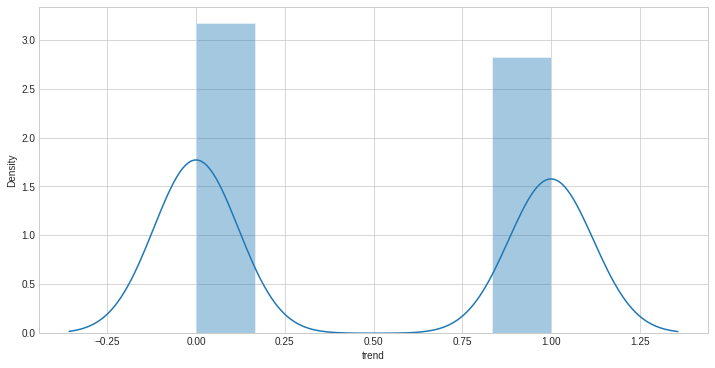

In [14]:
#Checking Distribution for all the dependent variable 
sns.distplot(GMM2['trend'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


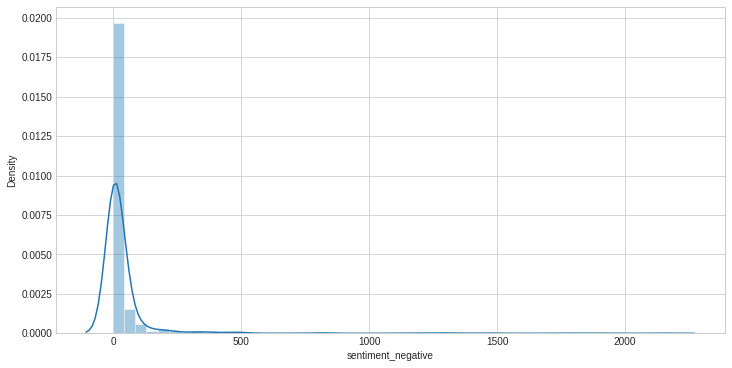

In [15]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['sentiment_negative'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


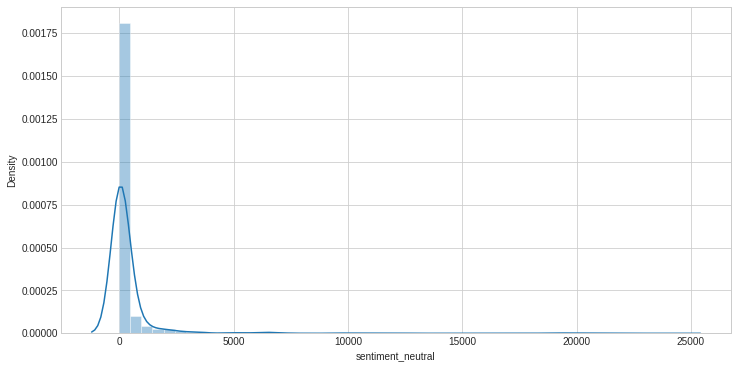

In [16]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['sentiment_neutral'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


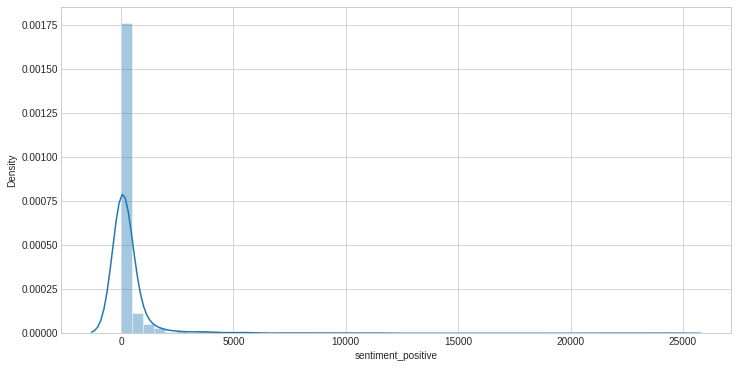

In [17]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['sentiment_positive'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


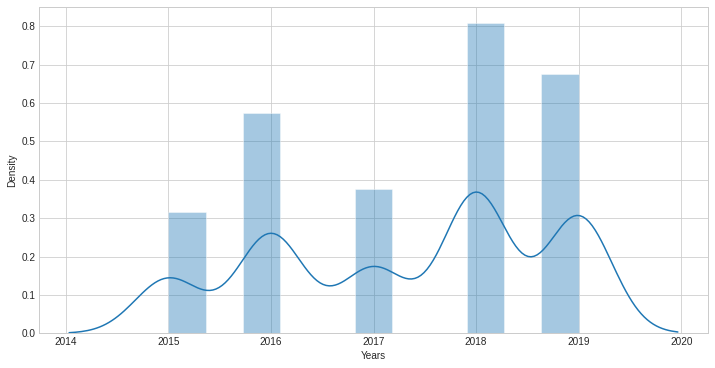

In [18]:
#Checking Distribution for some other variable
sns.distplot(GMM2['Years'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


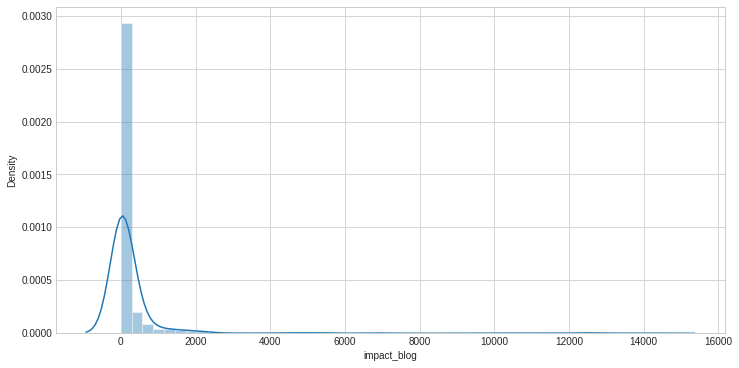

In [19]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['impact_blog'])

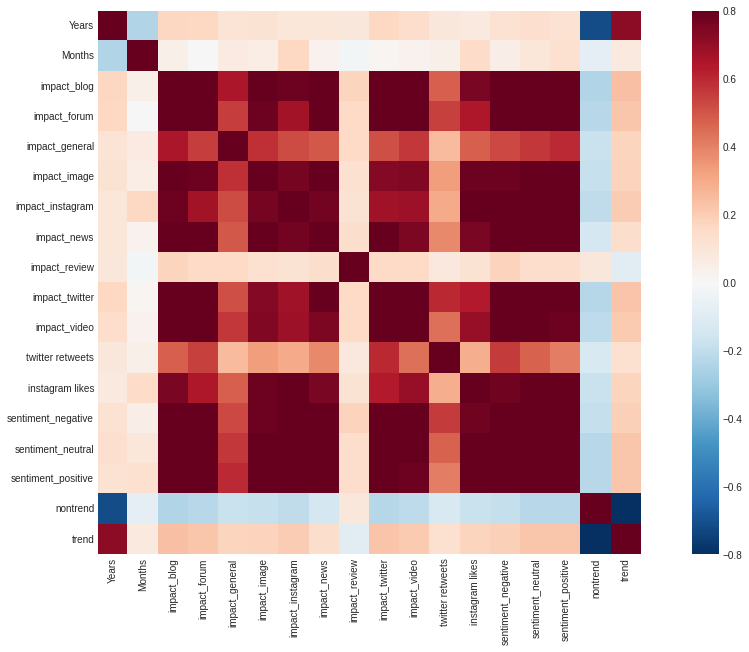

In [20]:
#correlation matrix for variables
corrmat = GMM2.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')

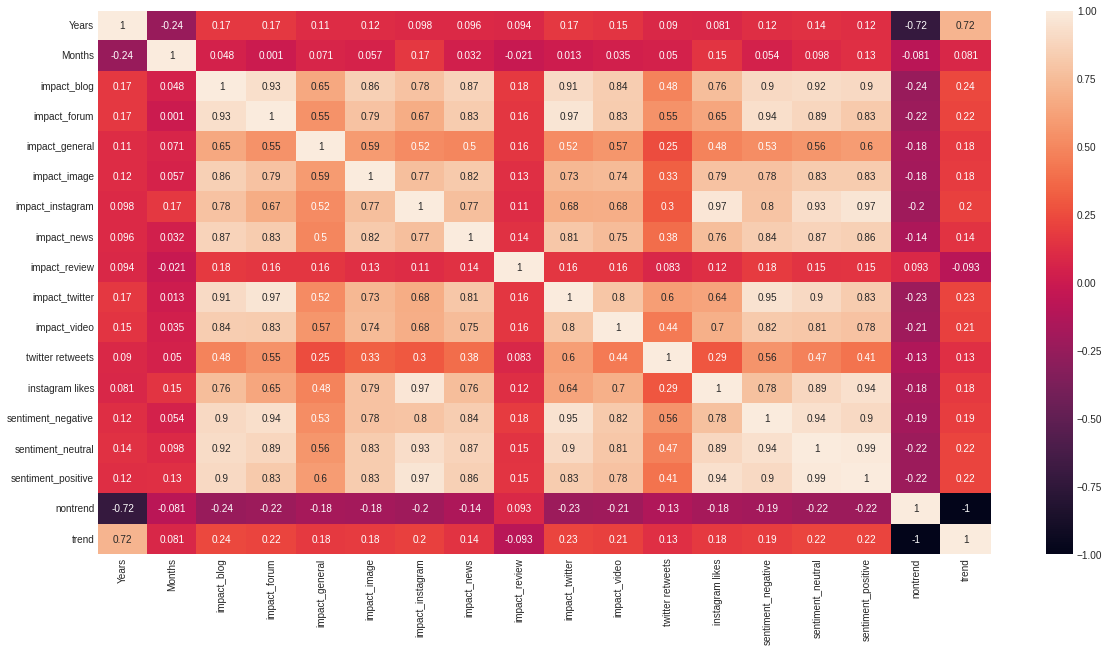

In [21]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10)) 
sns.heatmap(GMM2.corr(), annot=True) 

In [22]:
#Creating List of Variable
my_list = list(GMM2)
print (my_list)

['Keywords', 'Years', 'Months', 'impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_instagram', 'impact_news', 'impact_review', 'impact_twitter', 'impact_video', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'country', 'category', 'nontrend', 'trend']


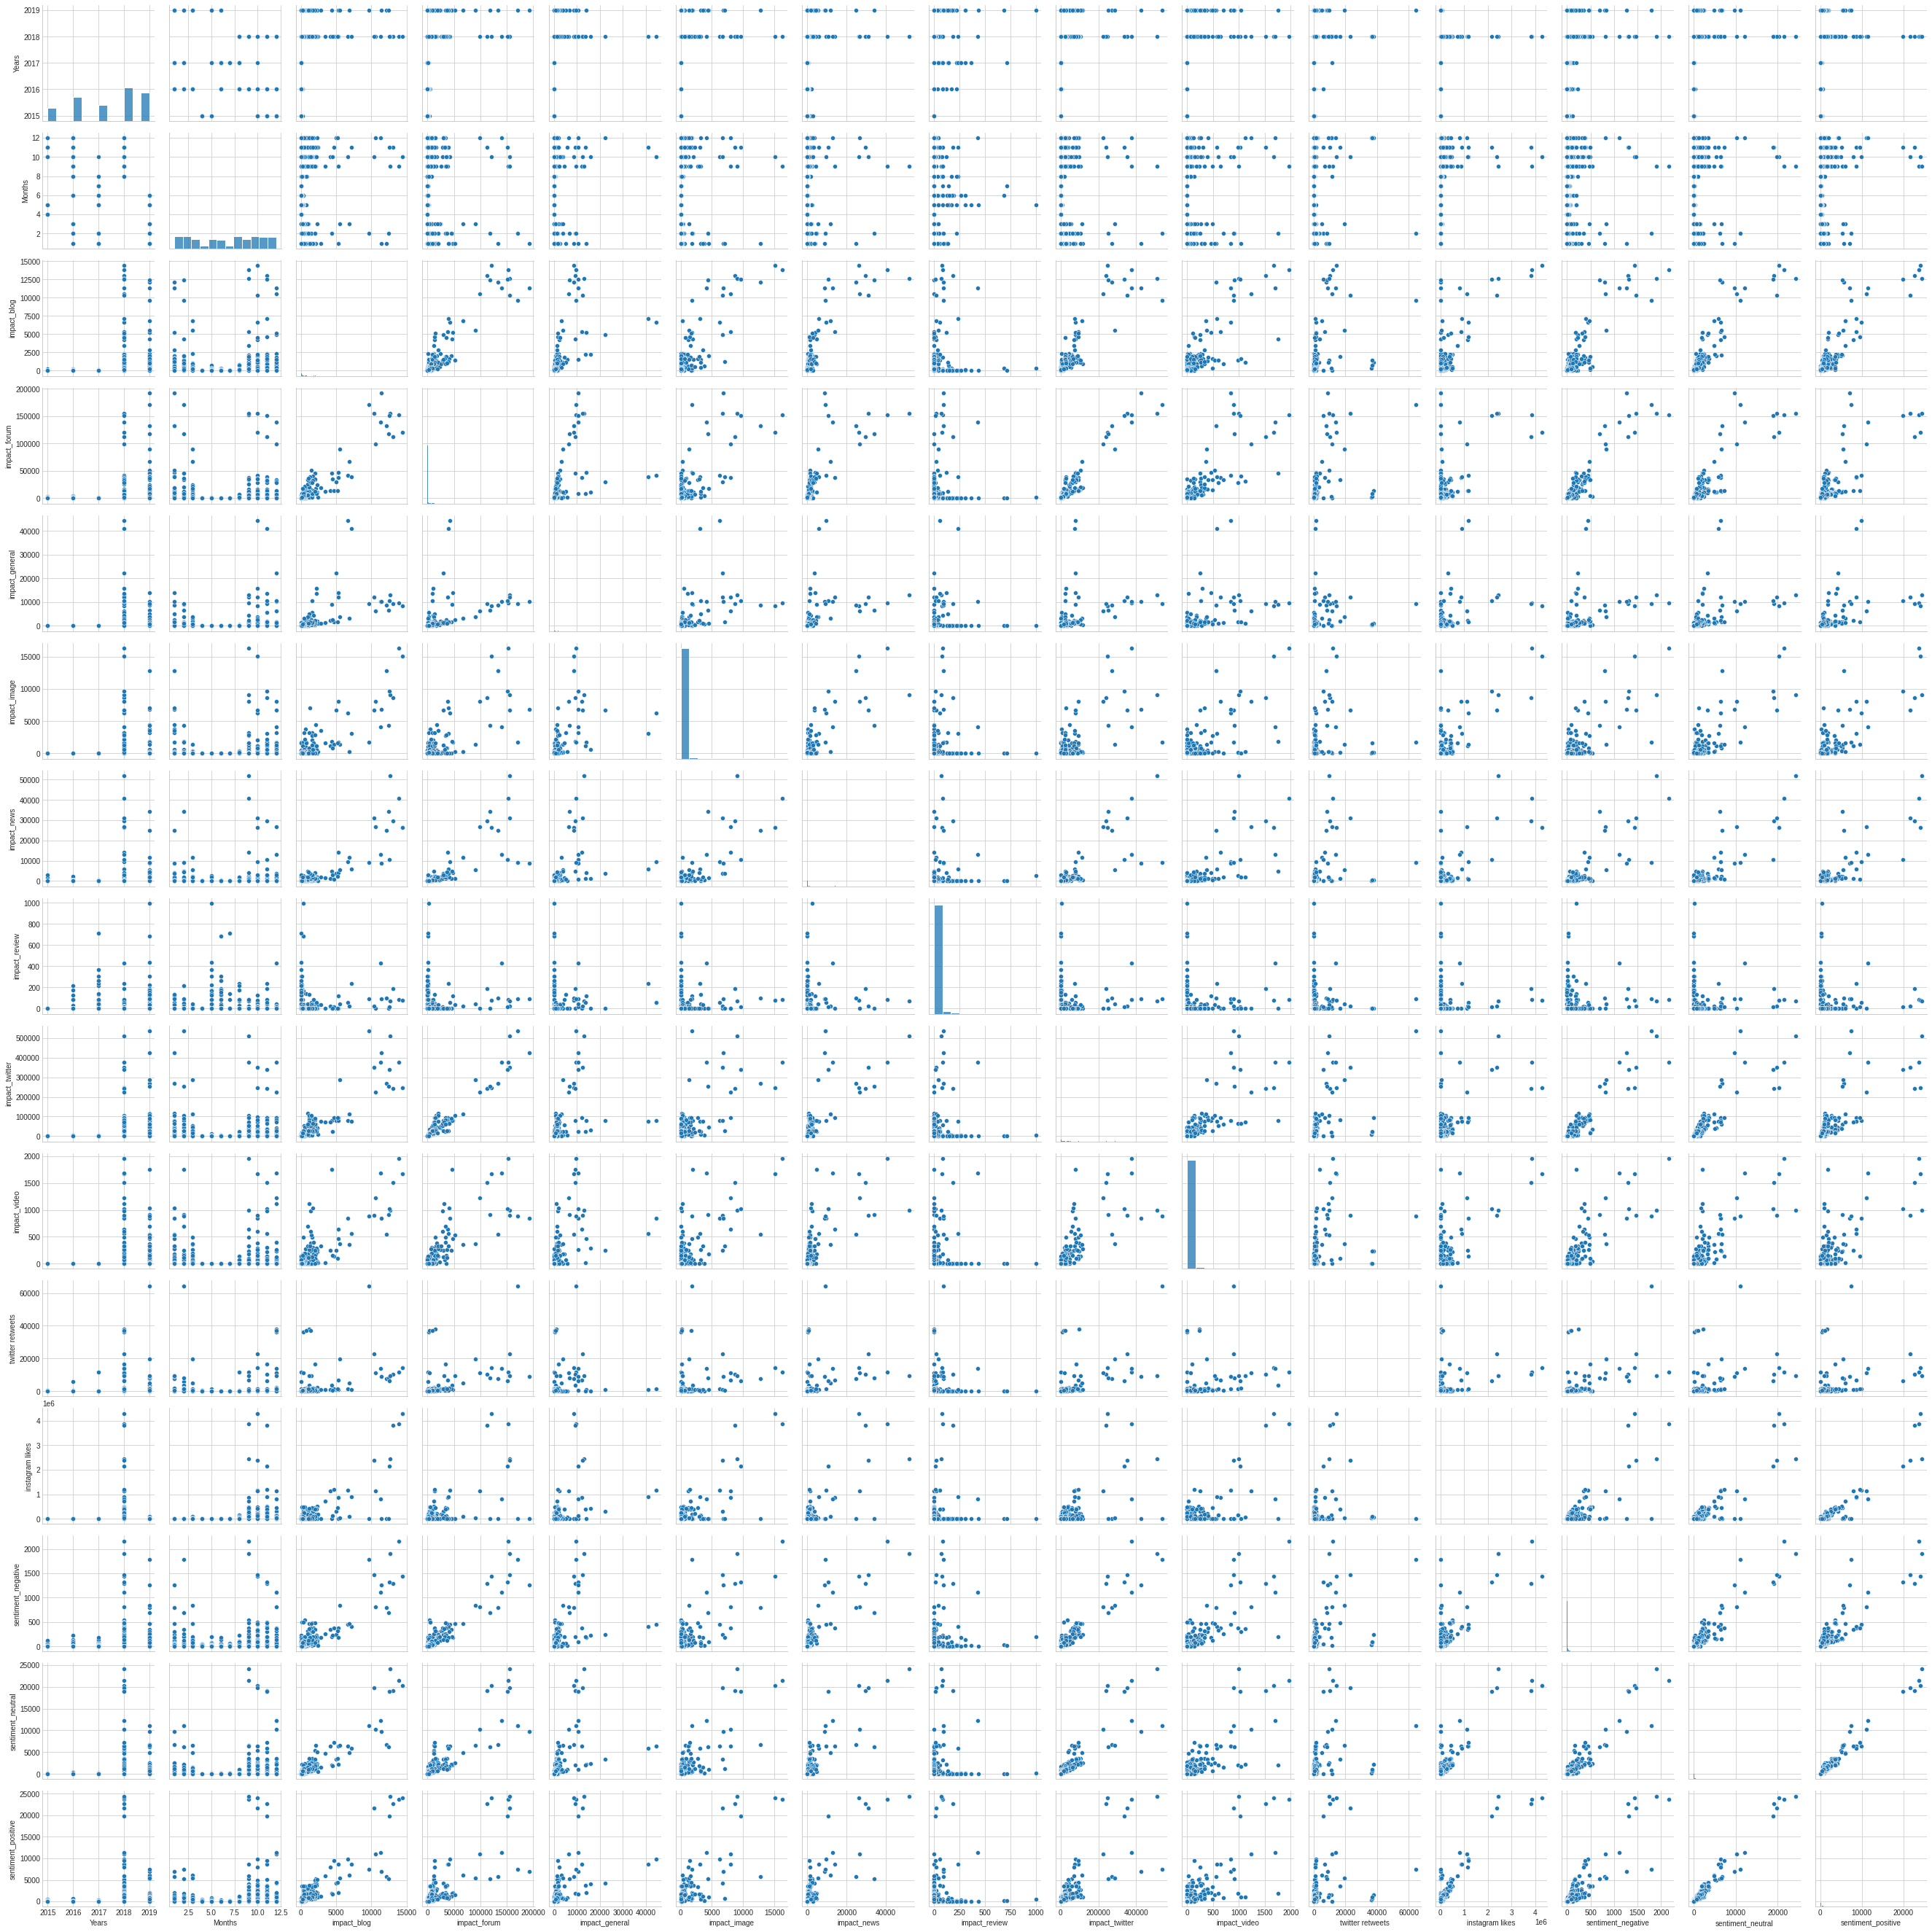

In [23]:
#scatter plots
cols = ['Years', 'Months', 'impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_news', 'impact_review', 'impact_twitter', 'impact_video', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']
sns.pairplot(GMM2[cols], height = 2.5)
plt.show()

In [24]:
#check features correlated with trend
corrmat['trend'].sort_values(ascending=False)


trend                 1.000000
Years                 0.718585
impact_blog           0.238283
impact_twitter        0.225648
sentiment_neutral     0.223782
impact_forum          0.223043
sentiment_positive    0.221409
impact_video          0.210484
impact_instagram      0.204186
sentiment_negative    0.189059
impact_image          0.181685
impact_general        0.177397
instagram likes       0.175785
impact_news           0.141798
twitter retweets      0.130943
Months                0.081158
impact_review        -0.092824
nontrend             -1.000000
Name: trend, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


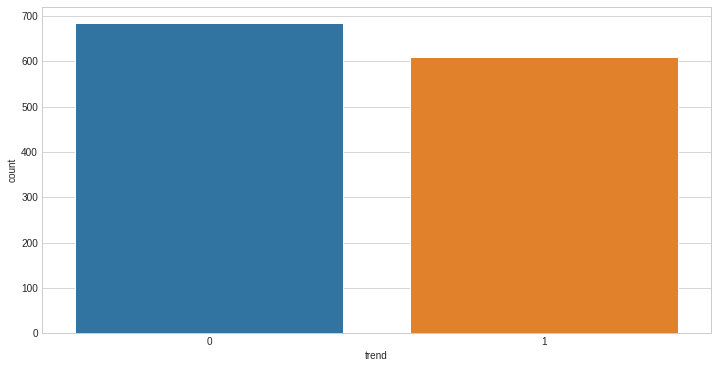

In [25]:
#Counting Trend and Non Trend Number
sns.countplot(GMM2['trend'], label = "Count")

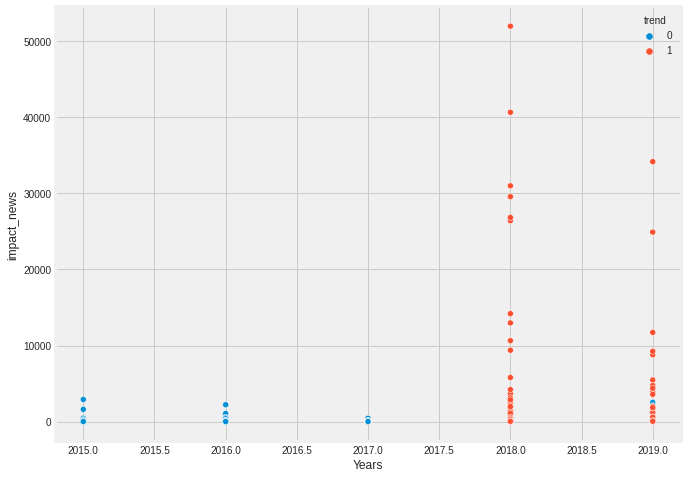

In [95]:
#Checking trend with impact_blog and impact_news
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'Years', y = 'impact_news', hue = 'trend', data = GMM2)

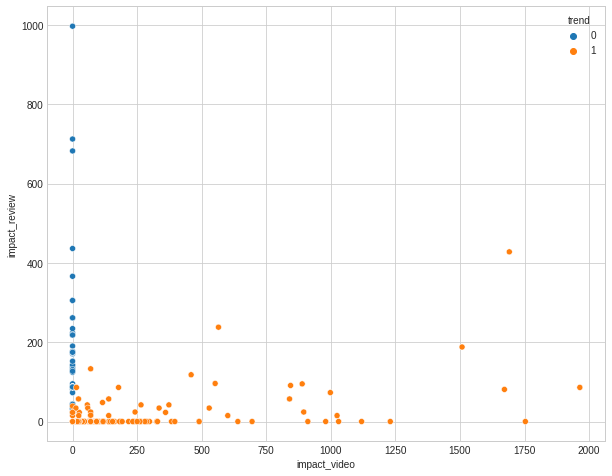

In [27]:
#Checking trend with impact_blog and impact_news
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'impact_video', y = 'impact_review', hue = 'trend', data = GMM2)

In [28]:
#EVERYTHING IS GOOD HERE##

In [29]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (1295, 16)
'y' shape: (1295,)


In [30]:
X_train = X
y_train = y

In [31]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [32]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [33]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[168,   0],
       [  4, 152]])

Text(0.5, 384.16, 'Predicted label')

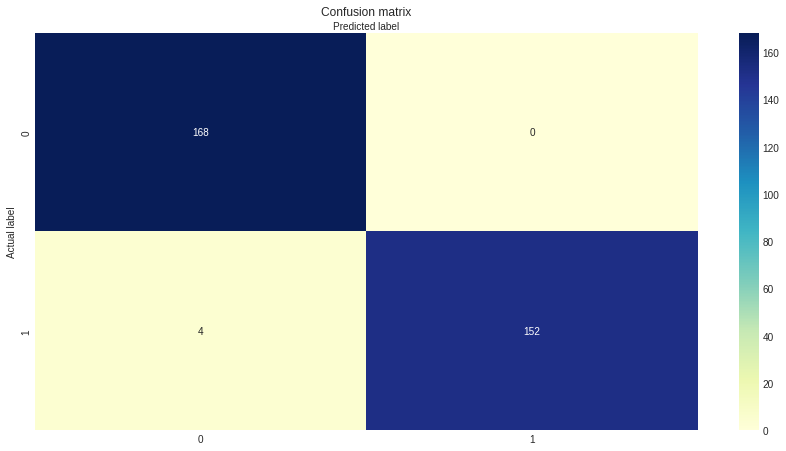

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9876543209876543
Precision: 1.0
Recall: 0.9743589743589743


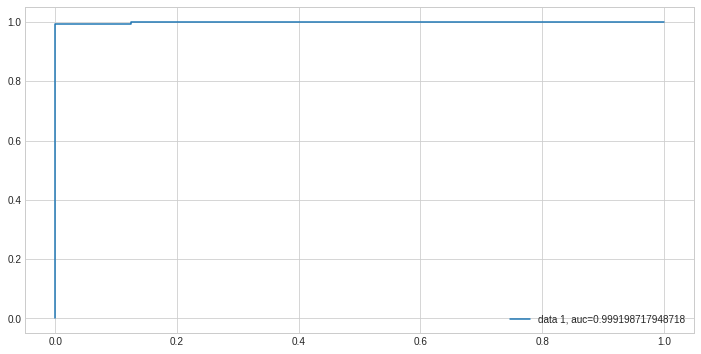

In [36]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=10000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [38]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[168,   0],
       [  4, 152]])

Text(0.5, 384.16, 'Predicted label')

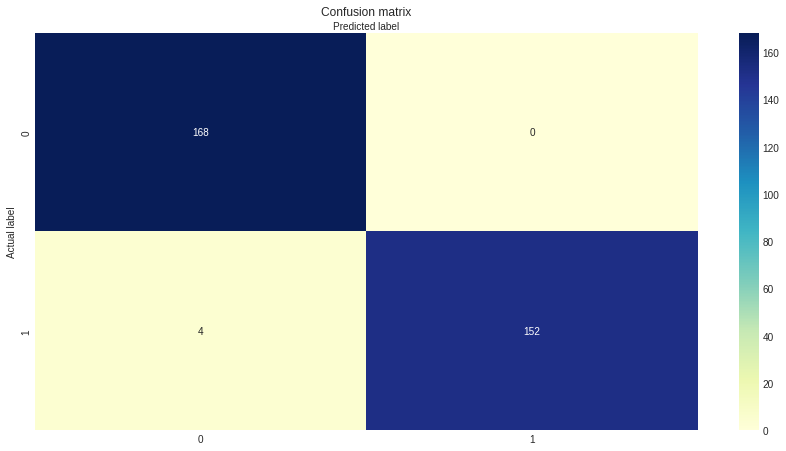

In [39]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9876543209876543
Precision: 1.0
Recall: 0.9743589743589743


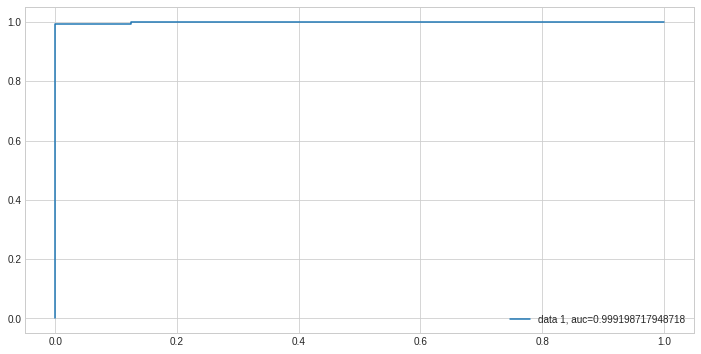

In [41]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Now Making Predictions on New Data Set

In [42]:
#Now Loading Test Data
#Reading xlsx FILE
cf = pd.read_excel('/content/drive/My Drive/Project_Seminar/Test/HoldoutUSSocial.xlsx')
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          407 non-null    int64  
 1   Keywords            407 non-null    object 
 2   Years               407 non-null    int64  
 3   Months              407 non-null    int64  
 4   impact_blog         407 non-null    float64
 5   impact_forum        407 non-null    float64
 6   impact_general      175 non-null    float64
 7   impact_image        175 non-null    float64
 8   impact_instagram    175 non-null    float64
 9   impact_news         407 non-null    float64
 10  impact_review       407 non-null    float64
 11  impact_twitter      407 non-null    float64
 12  impact_video        175 non-null    float64
 13  twitter retweets    407 non-null    int64  
 14  instagram likes     407 non-null    int64  
 15  sentiment_negative  407 non-null    int64  
 16  sentimen

In [43]:
##We want to see the columns which has atleast 2000 and above observations 
CMM = cf.dropna(axis='columns', thresh = 2)

In [44]:
# Drop the 'Unnamed: 0', 'full text', 'hashtags' and 'media urls' columns
CMM.drop(['Unnamed: 0', 'full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
CMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            407 non-null    object 
 1   Years               407 non-null    int64  
 2   Months              407 non-null    int64  
 3   impact_blog         407 non-null    float64
 4   impact_forum        407 non-null    float64
 5   impact_general      175 non-null    float64
 6   impact_image        175 non-null    float64
 7   impact_instagram    175 non-null    float64
 8   impact_news         407 non-null    float64
 9   impact_review       407 non-null    float64
 10  impact_twitter      407 non-null    float64
 11  impact_video        175 non-null    float64
 12  twitter retweets    407 non-null    int64  
 13  instagram likes     407 non-null    int64  
 14  sentiment_negative  407 non-null    int64  
 15  sentiment_neutral   407 non-null    int64  
 16  sentimen

In [45]:
#Verifying if we have any missing figures & Changing data type
CMM1 = CMM.fillna(0)
CMM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            407 non-null    object 
 1   Years               407 non-null    int64  
 2   Months              407 non-null    int64  
 3   impact_blog         407 non-null    float64
 4   impact_forum        407 non-null    float64
 5   impact_general      407 non-null    float64
 6   impact_image        407 non-null    float64
 7   impact_instagram    407 non-null    float64
 8   impact_news         407 non-null    float64
 9   impact_review       407 non-null    float64
 10  impact_twitter      407 non-null    float64
 11  impact_video        407 non-null    float64
 12  twitter retweets    407 non-null    int64  
 13  instagram likes     407 non-null    int64  
 14  sentiment_negative  407 non-null    int64  
 15  sentiment_neutral   407 non-null    int64  
 16  sentimen

In [46]:
#taking all variables for test
z_test = CMM1.drop(['country', 'category', 'Keywords'], axis=1)
z_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Years               407 non-null    int64  
 1   Months              407 non-null    int64  
 2   impact_blog         407 non-null    float64
 3   impact_forum        407 non-null    float64
 4   impact_general      407 non-null    float64
 5   impact_image        407 non-null    float64
 6   impact_instagram    407 non-null    float64
 7   impact_news         407 non-null    float64
 8   impact_review       407 non-null    float64
 9   impact_twitter      407 non-null    float64
 10  impact_video        407 non-null    float64
 11  twitter retweets    407 non-null    int64  
 12  instagram likes     407 non-null    int64  
 13  sentiment_negative  407 non-null    int64  
 14  sentiment_neutral   407 non-null    int64  
 15  sentiment_positive  407 non-null    int64  
dtypes: float

In [47]:
#taking all variables and full data for test 
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (1295, 16)
'y' shape: (1295,)


In [48]:
X_train = X
y_train = y

In [49]:
#Create New Model 
logreg1 = LogisticRegression(max_iter=3000)

# fit the model with full data
logreg1.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [50]:
predictions = logreg1.predict(z_test)

In [51]:
predictions1 = pd.DataFrame(predictions, columns=['trend'])
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   trend   407 non-null    uint8
dtypes: uint8(1)
memory usage: 535.0 bytes


In [52]:
new_file = pd.concat([CMM1, predictions1], axis =1)
new_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            407 non-null    object 
 1   Years               407 non-null    int64  
 2   Months              407 non-null    int64  
 3   impact_blog         407 non-null    float64
 4   impact_forum        407 non-null    float64
 5   impact_general      407 non-null    float64
 6   impact_image        407 non-null    float64
 7   impact_instagram    407 non-null    float64
 8   impact_news         407 non-null    float64
 9   impact_review       407 non-null    float64
 10  impact_twitter      407 non-null    float64
 11  impact_video        407 non-null    float64
 12  twitter retweets    407 non-null    int64  
 13  instagram likes     407 non-null    int64  
 14  sentiment_negative  407 non-null    int64  
 15  sentiment_neutral   407 non-null    int64  
 16  sentimen

In [53]:
from google.colab import files
new_file.to_csv('file_name_US_LG.csv') 
files.download('file_name_US_LG.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
#SO FAR SO GOOD HERE

In [55]:
pip install xgboost

In [56]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [57]:
#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35)

#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

XGBClassifier()

Train Data Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      1.00      1.00       396

    accuracy                           1.00       841
   macro avg       1.00      1.00      1.00       841
weighted avg       1.00      1.00      1.00       841

Test Data Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       214

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454



[Text(90.5, 0.5, 'real values'),
 Text(0.5, 36.5, 'predicted values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

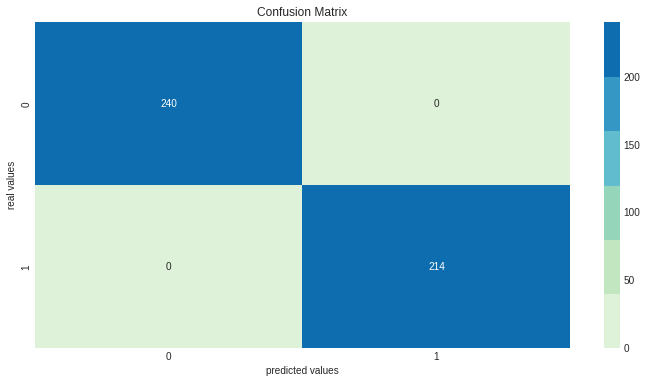

In [58]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [59]:
##Gradient Boosting Work better

In [60]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (1295, 16)
'y' shape: (1295,)


In [61]:
#XGBoost
xgb_mdl1 = XGBClassifier().fit(X_train,y_train)
xgb_mdl1

XGBClassifier()

In [62]:
predictions_xgb = xgb_mdl1.predict(z_test)

In [63]:
predictions_xgb1 = pd.DataFrame(predictions_xgb, columns=['trend'])
predictions_xgb1

,trend
0,0
1,0
2,0
3,0
4,0
...,...
402,1
403,1
404,1
405,1


In [64]:
new_file_xgb = pd.concat([CMM1, predictions_xgb1], axis =1)
new_file_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            407 non-null    object 
 1   Years               407 non-null    int64  
 2   Months              407 non-null    int64  
 3   impact_blog         407 non-null    float64
 4   impact_forum        407 non-null    float64
 5   impact_general      407 non-null    float64
 6   impact_image        407 non-null    float64
 7   impact_instagram    407 non-null    float64
 8   impact_news         407 non-null    float64
 9   impact_review       407 non-null    float64
 10  impact_twitter      407 non-null    float64
 11  impact_video        407 non-null    float64
 12  twitter retweets    407 non-null    int64  
 13  instagram likes     407 non-null    int64  
 14  sentiment_negative  407 non-null    int64  
 15  sentiment_neutral   407 non-null    int64  
 16  sentimen

In [65]:
from google.colab import files
new_file_xgb.to_csv('new_file_US_xgb.csv') 
files.download('new_file_US_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
#Everything is good here

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn import datasets

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostRegressor

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [69]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=3000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [70]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [71]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [72]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.9320987654320988
LogisticRegression 0.9814814814814815
DecisionTreeClassifier 1.0
VotingClassifier 0.9907407407407407


In [91]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, precision_score(y_test, y_pred))

KNeighborsClassifier 0.9787234042553191
LogisticRegression 0.9869281045751634
DecisionTreeClassifier 1.0
VotingClassifier 1.0


In [92]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, recall_score(y_test, y_pred))

KNeighborsClassifier 0.9019607843137255
LogisticRegression 0.9869281045751634
DecisionTreeClassifier 1.0
VotingClassifier 0.9869281045751634


In [93]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, f1_score(y_test, y_pred))

KNeighborsClassifier 0.9387755102040817
LogisticRegression 0.9869281045751634
DecisionTreeClassifier 1.0
VotingClassifier 0.993421052631579


In [73]:
#Now Using Ensemble Modeling

In [74]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (1295, 16)
'y' shape: (1295,)


In [75]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [76]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [77]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(z_test)

In [78]:
#Ensembling
predictions_ensem = pd.DataFrame(y_pred, columns=['trend'])
predictions_ensem

,trend
0,0
1,0
2,0
3,0
4,0
...,...
402,1
403,1
404,1
405,1


In [79]:
new_file_ensem = pd.concat([CMM1, predictions_ensem], axis =1)
new_file_ensem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            407 non-null    object 
 1   Years               407 non-null    int64  
 2   Months              407 non-null    int64  
 3   impact_blog         407 non-null    float64
 4   impact_forum        407 non-null    float64
 5   impact_general      407 non-null    float64
 6   impact_image        407 non-null    float64
 7   impact_instagram    407 non-null    float64
 8   impact_news         407 non-null    float64
 9   impact_review       407 non-null    float64
 10  impact_twitter      407 non-null    float64
 11  impact_video        407 non-null    float64
 12  twitter retweets    407 non-null    int64  
 13  instagram likes     407 non-null    int64  
 14  sentiment_negative  407 non-null    int64  
 15  sentiment_neutral   407 non-null    int64  
 16  sentimen

In [80]:
from google.colab import files
new_file_ensem.to_csv('new_file_US_ensem.csv') 
files.download('new_file_US_ensem.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
# Filter out columns of our interest in ensem
pf_ensem = new_file_ensem.loc[:, ["Keywords", "trend"]]
pf_ensem

,Keywords,trend
0,Anti-Oxidants,0
1,Anti-Oxidants,0
2,Anti-Oxidants,0
3,Anti-Oxidants,0
4,Anti-Oxidants,0
...,...,...
402,witch hazel,1
403,witch hazel,1
404,witch hazel,1
405,witch hazel,1


In [82]:
# Filter out columns of our interest in xgb
pf_xgb = new_file_xgb.loc[:, ["Keywords", "trend"]]
pf_xgb

,Keywords,trend
0,Anti-Oxidants,0
1,Anti-Oxidants,0
2,Anti-Oxidants,0
3,Anti-Oxidants,0
4,Anti-Oxidants,0
...,...,...
402,witch hazel,1
403,witch hazel,1
404,witch hazel,1
405,witch hazel,1


In [83]:
# Filter out columns of our interest in xgb
pf_lg = new_file.loc[:, ["Keywords", "trend"]]
pf_lg

,Keywords,trend
0,Anti-Oxidants,0
1,Anti-Oxidants,0
2,Anti-Oxidants,0
3,Anti-Oxidants,0
4,Anti-Oxidants,0
...,...,...
402,witch hazel,1
403,witch hazel,1
404,witch hazel,1
405,witch hazel,1


In [84]:
result = pd.concat([pf_ensem, pf_xgb, pf_lg], axis=1)
result.columns = ['Keywords', 'ensem_trend', 'Keywords2', 'xgb_trend', 'Keywords3', 'lg_trend']
all_model = result.drop(['Keywords2', 'Keywords3'], axis=1)

In [85]:
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend
0,Anti-Oxidants,0,0,0
1,Anti-Oxidants,0,0,0
2,Anti-Oxidants,0,0,0
3,Anti-Oxidants,0,0,0
4,Anti-Oxidants,0,0,0
...,...,...,...,...
402,witch hazel,1,1,1
403,witch hazel,1,1,1
404,witch hazel,1,1,1
405,witch hazel,1,1,1


In [86]:
cols_to_sum = all_model.columns[ : all_model.shape[0]-0]
cols_to_sum
all_model['total_count'] = all_model[cols_to_sum].sum(axis=1)

In [87]:
# create a list of our conditions
conditions = [
    (all_model['total_count'] < 2),
    (all_model['total_count'] >= 2)
    ]
# create a list of the values we want to assign for each condition
values = ['no trend', 'trend']

# create a new column and use np.select to assign values to it using our lists as arguments
all_model['trend?'] = np.select(conditions, values)

# display updated DataFrame
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend,total_count,trend?
0,Anti-Oxidants,0,0,0,0,no trend
1,Anti-Oxidants,0,0,0,0,no trend
2,Anti-Oxidants,0,0,0,0,no trend
3,Anti-Oxidants,0,0,0,0,no trend
4,Anti-Oxidants,0,0,0,0,no trend
...,...,...,...,...,...,...
402,witch hazel,1,1,1,3,trend
403,witch hazel,1,1,1,3,trend
404,witch hazel,1,1,1,3,trend
405,witch hazel,1,1,1,3,trend


In [88]:
all_model1 = all_model.groupby(['Keywords'])['trend?'].agg(pd.Series.mode).reset_index()

In [89]:
from google.colab import files
all_model1.to_csv('all_model1.csv') 
files.download('all_model1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**That's all folks**